In [3]:
# 이미지 밝기와 대조
# 영상의 밝기 조절을 구현하기 위해 함수를 만들어야함 0 ~ 255 한정인?

import numpy as np
import cv2 as cv

def brightness1():
    src = cv.imread("lenna.bmp", cv.IMREAD_GRAYSCALE)
    
    if src is None:
        print("Image load failed!")
        return

    dst = cv.add(src, 100) # add의 경우 밝기를 올리는 케이스고, subtract의 경우 밝기를 어둡게하는 케이스(cv.add(src,100))
    
    cv.imshow('src', src)
    cv.imshow('dst', dst)
    cv.waitKey()
    cv.destroyAllWindows()
    
brightness1()


In [ ]:
# 함수에 for 문을 이용해서 그냥 바로 돌린거는 최대 255로 고정이 안되고 값이 넘어가서 사진이 보기보다 좀 험악?해짐
import cv2 as cv
import numpy as np
def brightness2():
    src = cv.imread('lenna.bmp',cv.IMREAD_GRAYSCALE)
    
    if src is None:
        print("image open failed!")
        return
    print(src.shape)
    dst = np.empty(src.shape, dtype= src.dtype)
    
    for y in range(src.shape[0]):
        for x in range(src.shape[1]):
            dst[y, x] = src[y, x] + 100
    cv.imshow('src', src)
    cv.imshow('dst', dst)
    cv.waitKey()
    cv.destroyAllWindows()
    
brightness2()

(512, 512)


/var/folders/12/jv7m7k6s1_jcrb0n5nt03_180000gn/T/ipykernel_59492/3887646162.py:15: RuntimeWarning: overflow encountered in scalar add
  dst[y, x] = src[y, x] + 100


In [1]:
# 영상의 밝기 조절 직접 구현하기
# 디버깅 ㄱ
import numpy as np
import cv2 as cv

def saturated(value):
    if value > 255:
        value = 255
    elif value < 0:
        value = 0
    return value

def brightness3():
    src = cv.imread('lenna.bmp', cv.IMREAD_GRAYSCALE)
    
    if src is None:
        print('Image load failed!')
        return

    dst = np.empty(src.shape, dtype = src.dtype)
    for y in range(src.shape[0]):
        for x in range(src.shape[1]):
            dst[y, x] = saturated(int(src[y, x]) + 100)
    
    cv.imshow("src", src)
    cv.imshow('dst', dst)
    cv.waitKey()
    cv.destroyAllWindows()

brightness3()

In [8]:
# 트랙바를 이용한 영상의 밝기 조절
import cv2 as cv
import numpy as np

def brightness4():
    src = cv.imread('lenna.bmp', cv.IMREAD_GRAYSCALE)
    
    if src is None:
        print("File open failed!")
        return
    
    def update(pos):
        dst = cv.add(src, pos)
        cv.imshow('dst', dst)
    cv.namedWindow('dst')
    cv.createTrackbar('Brightness', 'dst', 0, 100, update)
    update(0)
    cv.waitKey()
    cv.destroyAllWindows()
    
brightness4()
    


In [13]:
# 기본적인 명암비 조절 방법
import cv2 as cv
import numpy as np

def contrast1():
    src = cv.imread('lenna.bmp', cv.IMREAD_GRAYSCALE)
    
    if src is None:
        print('Image load failed!')
        return
    
    s = 2.0
    dst = cv.multiply(src, s)
    cv.imshow('src', src)
    cv.imshow('dst', dst)
    cv.waitKey()
    cv.destroyAllWindows()

contrast1()
    

In [14]:
# 효과적인 명암비 조절 방법

def contrast2():
    src = cv.imread('lenna.bmp', cv.IMREAD_GRAYSCALE)
    
    if src is None:
        print('Image load failed')
        return

    alpha = 1.0
    dst = cv.convertScaleAbs(src, alpha = 1+alpha, beta = -128*alpha)
    cv.imshow('src', src)
    cv.imshow('dst', dst)
    cv.waitKey()
    cv.destroyAllWindows()
    
contrast2()

In [2]:
# 픽셀의 히스토그램 구하기
import cv2 as cv
import numpy as np
def calcGrayHist(img):
    channels = [0]
    histSize = [256]
    histRange = [0, 256]
    hist = cv.calcHist([img], channels, None, histSize, histRange)
    
    return hist

def getGrayHistImage(hist):
    _, histMax, _, _ = cv.minMaxLoc(hist) # min, max, min point, max point 값 순
    
    imgHist = np.ones((100, 256), np.uint8) * 255
    for x in range(imgHist.shape[1]):
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x, 0] * 100 / histMax))
        cv.line(imgHist, pt1, pt2, 0)
    
    return imgHist

src = cv.imread("lenna.bmp",cv.IMREAD_GRAYSCALE)
hist = calcGrayHist(src)
hist_img = getGrayHistImage(hist) # = getGrayHistImage(calcGrayHist(src))
cv.imshow("src", src)
cv.imshow("srcHist", hist_img)
cv.waitKey()
cv.destroyAllWindows()


In [3]:
# 히스토그램 스트레칭
import cv2 as cv
import numpy as np
def histogram_stretching():
    src = cv.imread('hawkes.bmp', cv.IMREAD_GRAYSCALE)
    if src is None:
        print('Image load failed!')
        return
    gmin, gmax, _, _ = cv.minMaxLoc(src)
    
    dst = cv.convertScaleAbs(src, alpha = 255.0/(gmax-gmin), beta = -gmin * 255.0/(gmax-gmin))
    cv.imshow('src',src)
    cv.imshow('srcHist', getGrayHistImage(calcGrayHist(src)))
    cv.imshow('dst',dst)
    cv.imshow('dstHist', getGrayHistImage(calcGrayHist(dst)))
    cv.waitKey()
    cv.destroyAllWindows()

histogram_stretching()

: 

In [17]:
# 히스토그램 평활화

def histogram_equalization():
    src = cv.imread('hawkes.bmp', cv.IMREAD_GRAYSCALE)
    
    if src is None:
        print('Image load failed!')
        return
    
    dst = cv.equalizeHist(src)
    cv.imshow('src', src)
    cv.imshow('srchist',getGrayHistImage(calcGrayHist(src)))
    
    cv.imshow('dst', dst)
    cv.imshow('dsthist',getGrayHistImage(calcGrayHist(dst)))
    
    cv.waitKey()
    cv.destroyAllWindows()
    
histogram_equalization()
    

: 

Matplotlib is building the font cache; this may take a moment.


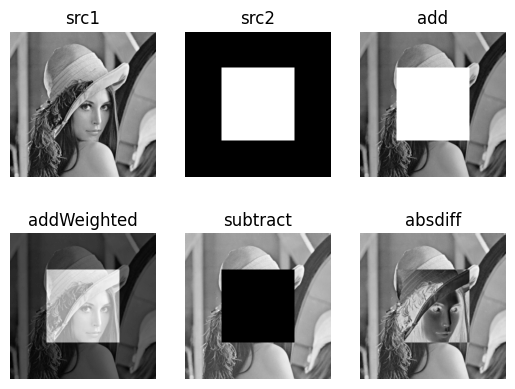

In [1]:
# 영상의 산술 연산
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

src1 = cv.imread('lenna256.bmp', cv.IMREAD_GRAYSCALE)
src2 = cv.imread('square.bmp', cv.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print("Image load failed!")
    exit()

dst1 = cv.add(src1, src2)
dst2 = cv.addWeighted(src1, 0.5, src2, 0.5, 0.0) # src1 과 0.5 (alpha), src2 와 0.5(beta) + gamma(=0.0)
dst3 = cv.subtract(src1, src2)
dst4 = cv.absdiff(src1, src2)

plt.subplot(231), plt.axis('off'), plt.imshow(src1, 'gray'), plt.title('src1')
plt.subplot(232), plt.axis('off'), plt.imshow(src2, 'gray'), plt.title('src2')
plt.subplot(233), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('add')
plt.subplot(234), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('addWeighted')
plt.subplot(235), plt.axis('off'), plt.imshow(dst3, 'gray'), plt.title('subtract')
plt.subplot(236), plt.axis('off'), plt.imshow(dst4, 'gray'), plt.title('absdiff')
plt.show()

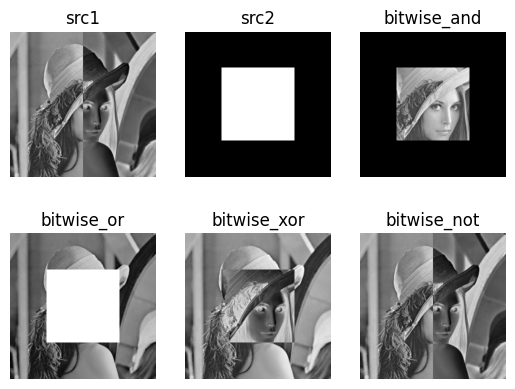

: 

In [9]:
# 영상의 논리 연산
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

src1 = cv.imread('lenna256.bmp', cv.IMREAD_GRAYSCALE)
src2 = cv.imread('square.bmp', cv.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image open failed!')
    exit()

dst1 = cv.bitwise_and(src1, src2)
dst2 = cv.bitwise_or(src1, src2)
dst3 = cv.bitwise_xor(src1, src2)
dst4 = cv.bitwise_not(src1)
#src1[:,src1.shape[1]//2:] = cv.bitwise_not(src1[:,src1.shape[1]//2:])

plt.subplot(231),plt.axis('off'),plt.imshow(src1,'gray'), plt.title('src1')
plt.subplot(232),plt.axis('off'),plt.imshow(src2,'gray'), plt.title('src2')
plt.subplot(233),plt.axis('off'),plt.imshow(dst1,'gray'), plt.title('bitwise_and')
plt.subplot(234),plt.axis('off'),plt.imshow(dst2,'gray'), plt.title('bitwise_or')
plt.subplot(235),plt.axis('off'),plt.imshow(dst3,'gray'), plt.title('bitwise_xor')
plt.subplot(236),plt.axis('off'),plt.imshow(dst4,'gray'), plt.title('bitwise_not')
# plt.subplot(236),plt.axis('off'),plt.imshow(src1,'gray'), plt.title('bitwise_not')
plt.show()


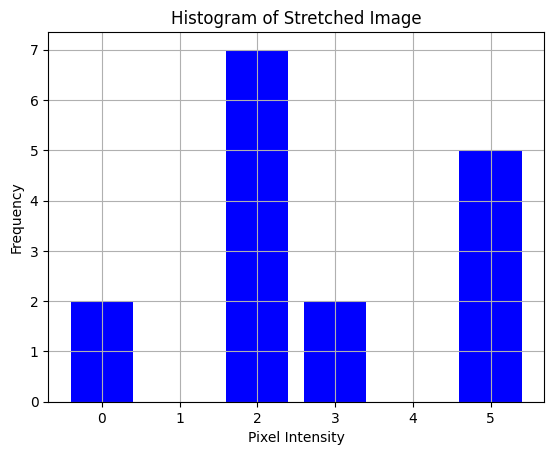

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 변환된 히스토그램 스트레칭 결과
data_stretched = np.array([
    [5, 2, 3, 2],
    [2, 5, 2, 5],
    [2, 3, 0, 2],
    [5, 0, 5, 2]
], dtype=np.uint8)

# 히스토그램을 그리기 위해 1차원으로 평탄화
flattened_data = data_stretched.flatten()

# 히스토그램 그리기
plt.hist(flattened_data, bins=range(7), rwidth=0.8, align='left', color='blue')
plt.title('Histogram of Stretched Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xticks(range(6))
plt.grid(True)
plt.show()